In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from classificator import Classificator, PCA_method
from matplotlib import pyplot as plt
np.random.seed(777)

In [2]:
n1, n2 = 500, 500
mu1, mu2 = np.array([1,2, 3]),  np.array([2,1,3])
cov = np.array([[0.5, 1, 0],
                [1, 2.5, 0],
                [0, 0, 1]])
    

x1, y1, x2, y2 = np.random.multivariate_normal(mu1, cov, n1), np.zeros(n1), np.random.multivariate_normal(mu2, cov, n2), np.ones(n2)

n = 200
x_train, x_test, y_train, y_test = train_test_split(np.vstack((x1, x2)), np.hstack((y1, y2)), test_size=n, random_state=1234)


m/n P(2|1): 0.009615384615384616, P(1|2): 0.010416666666666666
Метрика P(2|1): 0.010282984646538642, P(1|2): 0.010049908930866


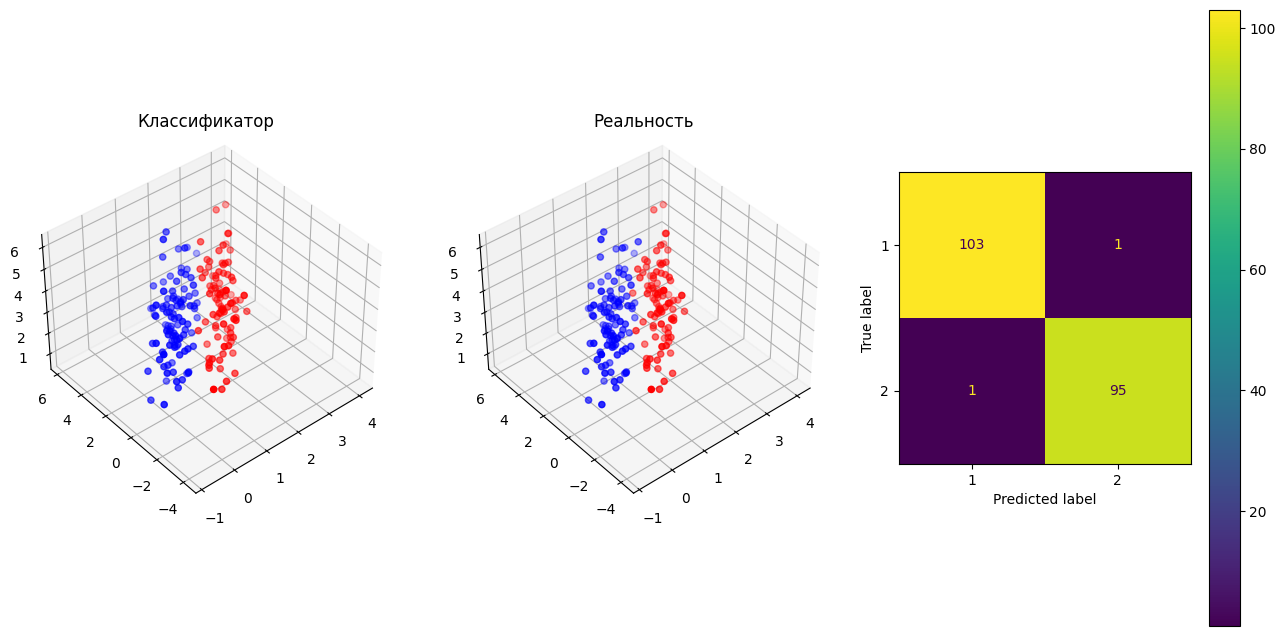

In [3]:
classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 3, 1,projection='3d')

ax1.set_title('Классификатор')
ax1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], color=['r' if i else 'b' for i in y_res])
ax1.view_init(40, -130)

ax2 = fig.add_subplot(1, 3, 2,projection='3d')
ax2.set_title('Реальность')
ax2.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], color=['r' if i else 'b' for i in y_test])
ax2.view_init(40, -130)
ax3 = fig.add_subplot(1,3,3)


cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot(ax = ax3)
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'Метрика P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

m/n P(2|1): 0.11538461538461539, P(1|2): 0.5428571428571428
С помощью метрики и  P(2|1): 0.0866706969583475, P(1|2): 0.5779697445528251


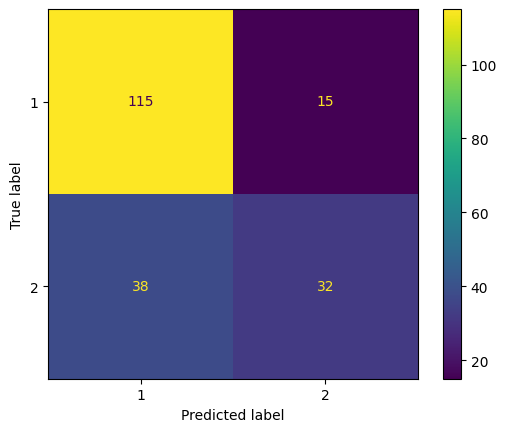

In [4]:
def preprocess_german_data():
    X = []
    Y = []
    with open("german.data-numeric") as data:
        for row in data:
            string = list(map(int, row.split()))
            X.append(string[:-1])
            Y.append(string[-1] - 1)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

x, y = preprocess_german_data()
n = 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n, random_state=1234)

classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot()
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'С помощью метрики и  P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

In [5]:
n1, n2 = 500, 500
mu1, mu2 = np.array([1,2, 3]),  np.array([2,2,3])
cov = np.array([[0.5, 1, 0],
                [1, 2.5, 0],
                [0, 0, 1]])

x1, y1, x2, y2 = np.random.multivariate_normal(mu1, cov, n1), np.zeros(n1), np.random.multivariate_normal(mu2, cov, n2), np.ones(n2)

n = 200
x_train, x_test, y_train, y_test = train_test_split(PCA_method(np.vstack((x1, x2)), 2), np.hstack((y1, y2)), test_size=n, random_state=1234)

m/n P(2|1): 0.625, P(1|2): 0.34375
Метрика P(2|1): 0.8801368531697024, P(1|2): 0.1165204804628786


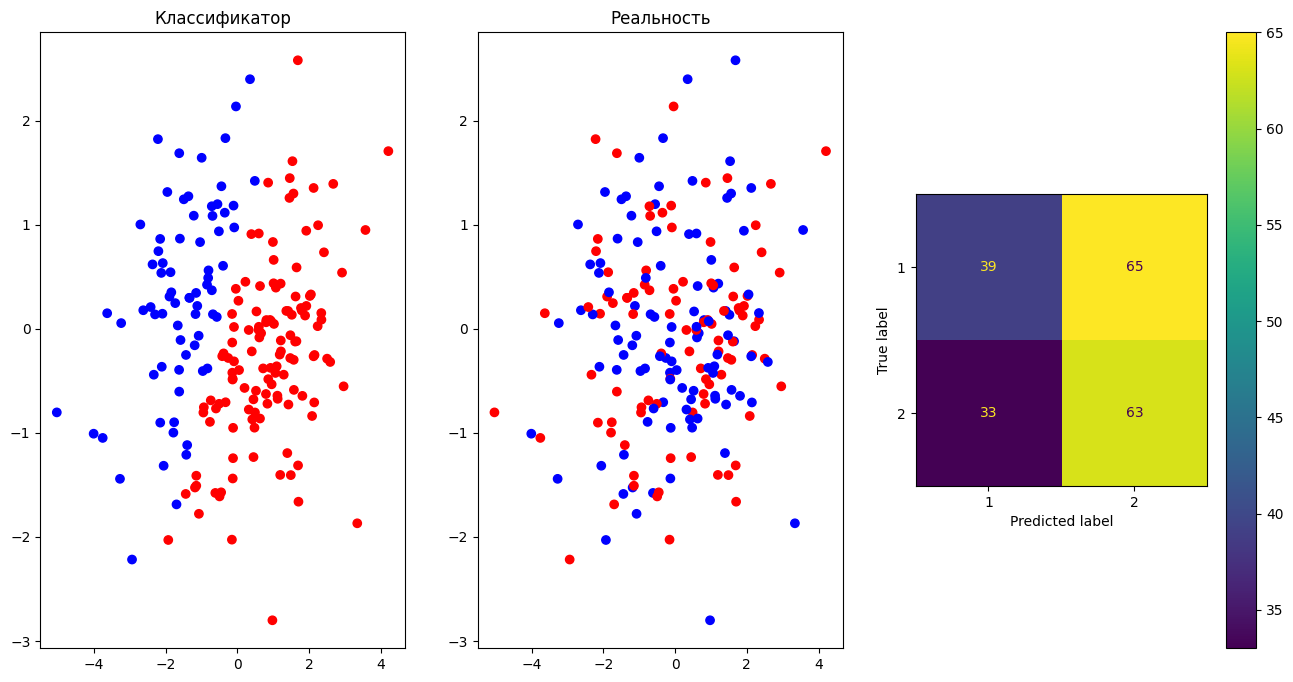

In [6]:
classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Классификатор')
ax1.scatter(x_test[:, 0], x_test[:, 1], color=['r' if i else 'b' for i in y_res])

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Реальность')
ax2.scatter(x_test[:, 0], x_test[:, 1], color=['r' if i else 'b' for i in y_test])
ax3 = fig.add_subplot(1,3,3)


cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot(ax = ax3)
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'Метрика P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

m/n P(2|1): 0.1, P(1|2): 0.6
С помощью метрики и  P(2|1): 0.08583467600146316, P(1|2): 0.5911993437555154


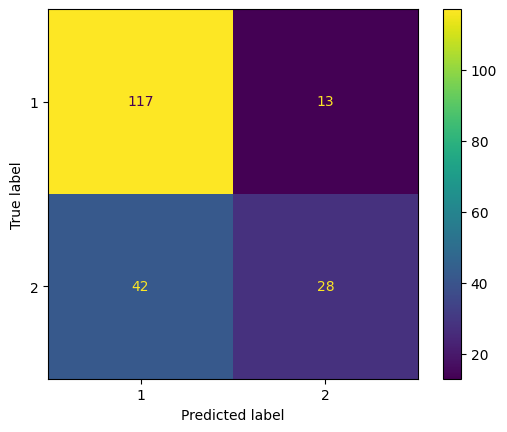

In [7]:

x, y = preprocess_german_data()
n = 200
x_train, x_test, y_train, y_test = train_test_split(PCA_method(x, 18), y, test_size=n, random_state=1234)

classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot()
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'С помощью метрики и  P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()